# 2021/12/14
# 本代码绘制24侯的925hpa温度场
# 控制实验和无印度大陆实验

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

In [6]:
path  =  "/home/sun/qomo-data/zhuang_plev/"
f1    =  xr.open_dataset(path+"plev_con_T.nc").sel(lev=925)
f2    =  xr.open_dataset(path+"plev_id_T.nc").sel(lev=925)

### 这里玩个花的试试隐循环处理成pentad平均

In [7]:
con_pentad_t  =  np.array([np.average(f1.T.data[i*5:i*5+5],axis=0) for i in range(0,73)])
id_pentad_t   =  np.array([np.average(f2.T.data[i*5:i*5+5],axis=0) for i in range(0,73)])

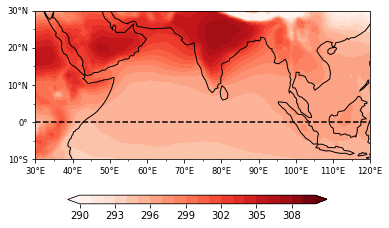

In [14]:
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  30,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f1.lon,f1.lat,con_pentad_t[25,:],levels=np.linspace(290,310,21).astype(int),cmap='Reds',alpha=1,extend='both')

ax.plot([30,120],[0,0],'k--')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')



fig1.subplots_adjust(top=0.8)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

plt.savefig("/home/sun/paint/lunwen/t_925_con_famil.pdf",dpi=300)

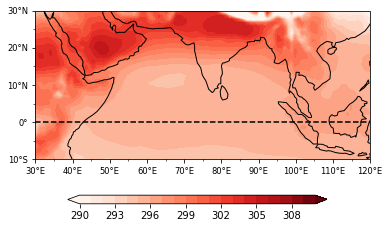

In [15]:
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)
lonmin,lonmax,latmin,latmax  =  30,120,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure()
    
ax = fig1.add_subplot(111,projection=proj)
ax.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
ax.set_extent(extent, crs=proj)

im  =  ax.contourf(f1.lon,f1.lat,id_pentad_t[25,:],levels=np.linspace(290,310,21).astype(int),cmap='Reds',alpha=1,extend='both')

ax.plot([30,120],[0,0],'k--')
#im  =  ax.contourf(f.lon,f.lat,np.average(f.T2M.data,axis=0),cmap='coolwarm',alpha=1,extend='both')




cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03])
fig1.colorbar(im, cax=cbar_ax, shrink=0.5, pad=0.2, orientation='horizontal')

plt.savefig("/home/sun/paint/lunwen/t_925_id_famil.pdf",dpi=300)